# Fake News Detection using Naïve Bayes
We have created a model to determine if a piece of news is fake or not, based on its title. We have used 4 Naïve Bayes algorithms, namely Gaussian, Bernoulli and Multinomial.

**About Dataset**

The dataset that we have used is from [Kaggle](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset) and submitted by [Clément Bisaillon](https://www.kaggle.com/clmentbisaillon)

Dataset: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

The zip file contains two csv files


*   Fake.csv
*   True.csv

Both files contain 4 columns. Fake.csv contains 23481 rows and True.csv contains 21417 rows.

###About The Model
Naïve Bayes has proven to not only be simple but also fast, accurate, and reliable Machine Learning algorithm, that works really well with `Natural Language Processing (NLP)`-related problems.

Naïve Bayes is a probabilistic machine learning algorithm based on the Bayes Theorem, used in a wide variety of classification tasks.

**Bayes Theorem**

Bayes Theorem is conditional probability is a measure of the probability of an event occurring given that another event has (by assumption, presumption, assertion, or evidence) occurred.

![picture](https://www.kdnuggets.com/wp-content/uploads/bayes-nagesh-1.jpg)
<center>Source: https://www.kdnuggets.com/2020/06/naive-bayes-algorithm-everything.html</center>

###Installing kaggle and importing datasets
We've installed kaggle on our Google Colab notebook and imported the dataset [Fake and real news dataset](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset). 


In [165]:
!pip install kaggle
!mkdir "/.kaggle"
!copy kaggle.json "/.kaggle/"
# !chmod 600 "/.kaggle/kaggle.json"


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
The syntax of the command is incorrect.


The system cannot find the file specified.


In [166]:
!kaggle datasets download clmentbisaillon/fake-and-real-news-dataset

Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
License(s): CC-BY-NC-SA-4.0
fake-and-real-news-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


After downloading the dataset, we have to unzip the zip file.

In [167]:
# !unzip fake-and-real-news-dataset
# In your Jupyter/Colab notebook, use the '!' prefix to run PowerShell commands
!powershell Expand-Archive -Path fake-and-real-news-dataset.zip -DestinationPath .

ExpandArchiveHelper : Failed to create file 
'C:\Users\USER\Documents\Github\Fake-News-Detection-Using-Naive-Bayes\Fake.csv' while expanding the archive file 
'C:\Users\USER\Documents\Github\Fake-News-Detection-Using-Naive-Bayes\fake-and-real-news-dataset.zip' contents as the 
file 'C:\Users\USER\Documents\Github\Fake-News-Detection-Using-Naive-Bayes\Fake.csv' already exists. Use the -Force 
parameter if you want to overwrite the existing directory 
'C:\Users\USER\Documents\Github\Fake-News-Detection-Using-Naive-Bayes\Fake.csv' contents when expanding the archive 
file.
At 
C:\WINDOWS\system32\WindowsPowerShell\v1.0\Modules\Microsoft.PowerShell.Archive\Microsoft.PowerShell.Archive.psm1:397 
char:17
+ ...             ExpandArchiveHelper $resolvedSourcePaths $resolvedDestina ...
+                 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    + CategoryInfo          : InvalidOperation: (C:\Users\USER\D...-Bayes\Fake.csv:String) [Write-Error], IOException
    + FullyQualifi

In [168]:
!pip install scikit-learn
!pip install seaborn
!pip install nltk



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


###Importing All Dependencies

In [169]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [170]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

We have created two dataframes from the two CSV files that we have fetched from Kaggle.

In [171]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [172]:
true.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [173]:
fake.shape

(23481, 4)

In [174]:
true.shape

(21417, 4)

In [175]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


Dropping the column `subject`, `date` and `text` as we do not require them.

In [176]:
fake.drop(['subject','date'], axis=1, inplace=True)


We don't have any target column in the files. Therefore, we added 0 in all rows in a newly created column in Fake.csv file, using list comprehension.

In [177]:
fake['target'] = pd.Series([0 for x in range(len(fake.index))])

In [178]:
fake.head()

,title,text,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0


Dropping the column `subject`, `date` and `text` as we do not require them.

In [179]:
true.drop(['subject','date'], axis=1, inplace=True)

We don't have any target column in the files. Therefore, we added 1 in all rows in a newly created column in True.csv file, using list comprehension.

In [180]:
true['target'] = pd.Series([1 for x in range(len(true.index))])

In [181]:
true.head()

,title,text,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


Due to our limitation in computing power, we cannot keep all the rows in the two files and instead keep only 5000 rows from each of the files.

In [182]:
true.drop(true.index[5000:], inplace=True)

In [183]:
true.shape

(5000, 3)

In [184]:
fake.drop(fake.index[5000:], inplace=True)

In [185]:
fake.shape


(5000, 3)

In [186]:
# Limit the "text" column in both fake and true datasets to the first 150 words
fake['text'] = fake['text'].apply(lambda x: ' '.join(str(x).split()[:150]))
true['text'] = true['text'].apply(lambda x: ' '.join(str(x).split()[:150]))

###Merging the two dataframes
Since, we now have target column inboth the files, we can merge them and create a new dataframe `data`

In [187]:
# data = fake.append(true, ignore_index=True)
data = pd.concat([fake, true], ignore_index=True)

In [188]:
data.head()

,title,text,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0


In [189]:
data.tail()

,title,text,target
9995,U.S. Agriculture secretary nominee submits eth...,(Reuters) - U.S. President Donald Trump’s nomi...,1
9996,Trump aides attack agency that will analyze he...,WASHINGTON (Reuters) - Aides to U.S. President...,1
9997,Highlights: The Trump presidency on March 12 a...,(Reuters) - Highlights of the day for U.S. Pre...,1
9998,Obama lawyers move fast to join fight against ...,WASHINGTON (Reuters) - When Johnathan Smith re...,1
9999,Mike Pence to tour Asia next month amid securi...,JAKARTA (Reuters) - U.S. Vice President Mike P...,1


In [190]:
data.shape

(10000, 3)

We're going to shuffle the dataset to randomize our data resetting the `index`

In [191]:
data = data.sample(frac=1, random_state=1, ignore_index=True)

In [192]:
data.head()

,title,text,target
0,U.S. government says 12.2 million consumers in...,NEW YORK (Reuters) - The U.S. government said ...,1
1,Teacher Tells Black Students He’ll Have Trump...,It appears the repercussions of a Donald Trump...,0
2,WATCH: Louisiana Governor Tells Republicans T...,"Once again, Republicans are throwing a hissy f...",0
3,Couple Married 37 Years In Disagreement On El...,This election is bringing out all kinds of emo...,0
4,U.S. Treasury would run out of cash by early A...,WASHINGTON (Reuters) - The U.S. Treasury would...,1


In [193]:
data.tail()

,title,text,target
9995,Dan Rather Takes Kellyanne Conway To The Wood...,After Trump spokeswoman Kellyanne Conway had t...,0
9996,"Among Trump associates, concern and frustratio...",WASHINGTON (Reuters) - Fresh off one foreign t...,1
9997,Trump Spoke With Putin About Election Interfe...,"On Friday, Donald Trump finally got the chance...",0
9998,Factbox: Trump on Twitter (December 12) - Demo...,The following statements were posted to the ve...,1
9999,GOP Lawmaker: Republicans Are Freaking Out Ab...,Sen. Bob Corker (R-TN) is being defended by on...,0


##Pre-processing
###Letter Case, Punctuation and Stopwords
Let's start by removing punctuations, making all the words lowercase and removing stopwords.

In [194]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [195]:
def process_text(s):
  # Check string to see if they are a punctuation
  nopunc = [char for char in s if char not in string.punctuation]
  # Join the characters again to form the string.
  nopunc = ''.join(nopunc)
  # Convert string to lowercase and remove stopwords
  clean_string = [word.lower() for word in nopunc.split() if word not in stopwords.words('english')]
  return clean_string

In [ ]:
data['title'] = data['title'].apply(process_text)
data['text'] = data['text'].apply(process_text)

In [ ]:
data.head(3)

,title,text,target
0,"[why, it’s, good, news, for, conservatives, th...","[as, wellesley, graduate, i, shocked, dismayed...",0
1,"[democrats, caught, paying, halfway, house, pa...","[a, lawless, party, whose, end, always, justif...",0
2,"[lebanons, president, says, crisis, pm, hariri...","[beirut, reuters, lebanese, president, michel,...",1


In [ ]:
# join the words into a string
data['title'] = data['title'].apply(lambda x: " ".join(x))

In [ ]:
data['text'] = data['text'].apply(lambda x: " ".join(x))

In [ ]:
data['combined_text'] = data['title'] + " " + data['text']

In [ ]:
data.head(3)

,title,text,target,combined_text
0,why it’s good news for conservatives that bitt...,as wellesley graduate i shocked dismayed hilla...,0,why it’s good news for conservatives that bitt...
1,democrats caught paying halfway house patients...,a lawless party whose end always justifies mea...,0,democrats caught paying halfway house patients...
2,lebanons president says crisis pm hariris fran...,beirut reuters lebanese president michel aoun ...,1,lebanons president says crisis pm hariris fran...


###Converting Strings into categorical values
As of now, we only have strings as our feature, which we must split into words and turn these words into categorical values. To do this, we used both `Count Vectorizer` and `TFIDF Vectorizer` saved in dataframes `data_cv` and `data_tv`. We'll use `GaussianNB` on `data_tv` and `BernoulliNB` and `MultinomialNB` on `data_cv`

In [ ]:
#Using Count Vectorization
# cv=CountVectorizer()
# X_cv=cv.fit_transform(data.title).toarray()
# #Using TFIDF Vectorization
# tv=TfidfVectorizer()
# X_tv=tv.fit_transform(data.title).toarray()

# Instead of:
# X_cv = cv.fit_transform(data.combined_text).toarray()

# Do this:
cv = CountVectorizer()
X_cv = cv.fit_transform(data.combined_text).toarray() # X_cv is now a sparse matrix!

# And for TFIDF (if used):
tv = TfidfVectorizer()
X_tv = tv.fit_transform(data.combined_text).toarray() # X_tv is now a sparse matrix!



MemoryError: Unable to allocate 42.2 GiB for an array with shape (30000, 188651) and data type int64

In [ ]:
X_cv.shape

(30000, 188651)

In [ ]:
X_tv.shape

(30000, 188651)

In [ ]:
y = data[['target']]

###Splitting Train and Test Datasets

In [ ]:
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y, test_size=0.25, random_state=0)
X_train_tv, X_test_tv, y_train_tv, y_test_tv = train_test_split(X_tv, y, test_size=0.25, random_state=0)

We're going to import `GaussianNB`,`BernoulliNB`, `MultinomialNB` and `ComplementNB` from `sklearn.naive_bayes`

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

###Fitting Our Train Data to the Models

In [ ]:
gnb = GaussianNB()
y_pred_tv = gnb.fit(X_train_tv, y_train_tv).predict(X_test_tv)
print("Gaussian Naïve Bayes Algorithm's Accuracy Score:", accuracy_score(y_test_tv, y_pred_tv))
print("Gaussian Naïve Bayes Algorithm's Precision Score:", precision_score(y_test_tv, y_pred_tv))
print("Gaussian Naïve Bayes Algorithm's Recall Score:", recall_score(y_test_tv, y_pred_tv))
print("Gaussian Naïve Bayes Algorithm's F1 Score:", f1_score(y_test_tv, y_pred_tv))

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MemoryError: Unable to allocate 31.6 GiB for an array with shape (22500, 188651) and data type float64

<Axes: >

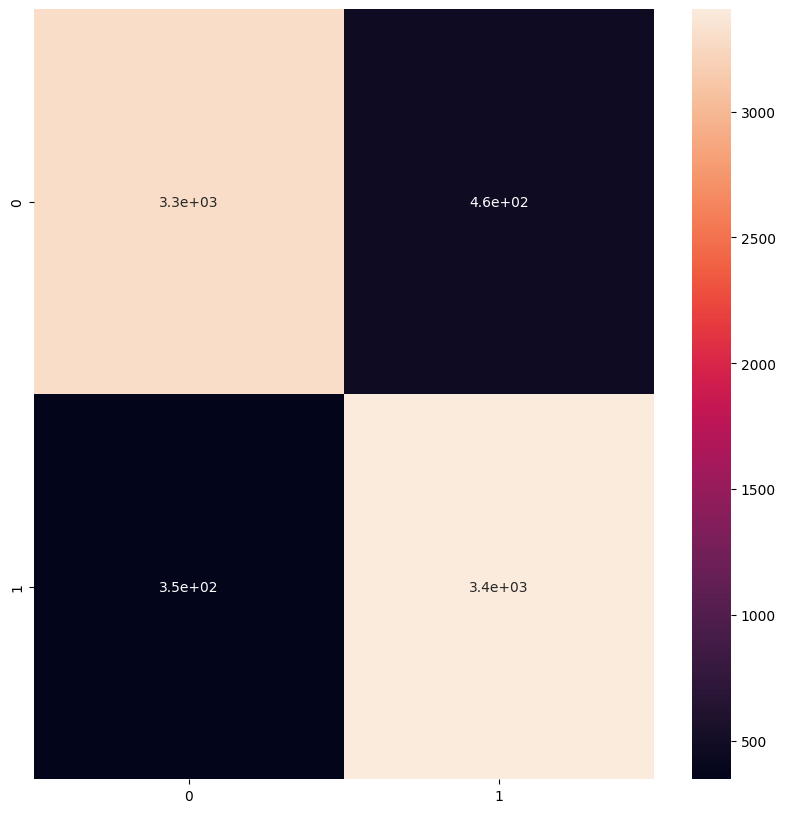

In [ ]:
#Get the confusion matrix
cm_gnb = confusion_matrix(y_test_tv, y_pred_tv)
plt.figure(figsize = (10, 10))
sns.heatmap(cm_gnb, annot = True)

In [ ]:
cm_gnb

array([[3290,  456],
       [ 348, 3406]], dtype=int64)

In [ ]:
bnb = BernoulliNB()
y_pred_cv = bnb.fit(X_train_cv, y_train_cv).predict(X_test_cv)
print("Bernoulli Naïve Bayes Algorithm's Accuracy Score:", accuracy_score(y_test_cv, y_pred_cv))
print("Bernoulli Naïve Bayes Algorithm's Precision Score:", precision_score(y_test_cv, y_pred_cv))
print("Bernoulli Naïve Bayes Algorithm's Recall Score:", recall_score(y_test_cv, y_pred_cv))
print("Bernoulli Naïve Bayes Algorithm's F1 Score:", f1_score(y_test_cv, y_pred_cv))

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Bernoulli Naïve Bayes Algorithm's Accuracy Score: 0.9884
Bernoulli Naïve Bayes Algorithm's Precision Score: 0.9898477157360406
Bernoulli Naïve Bayes Algorithm's Recall Score: 0.9869472562599894
Bernoulli Naïve Bayes Algorithm's F1 Score: 0.9883953581432573


<Axes: >

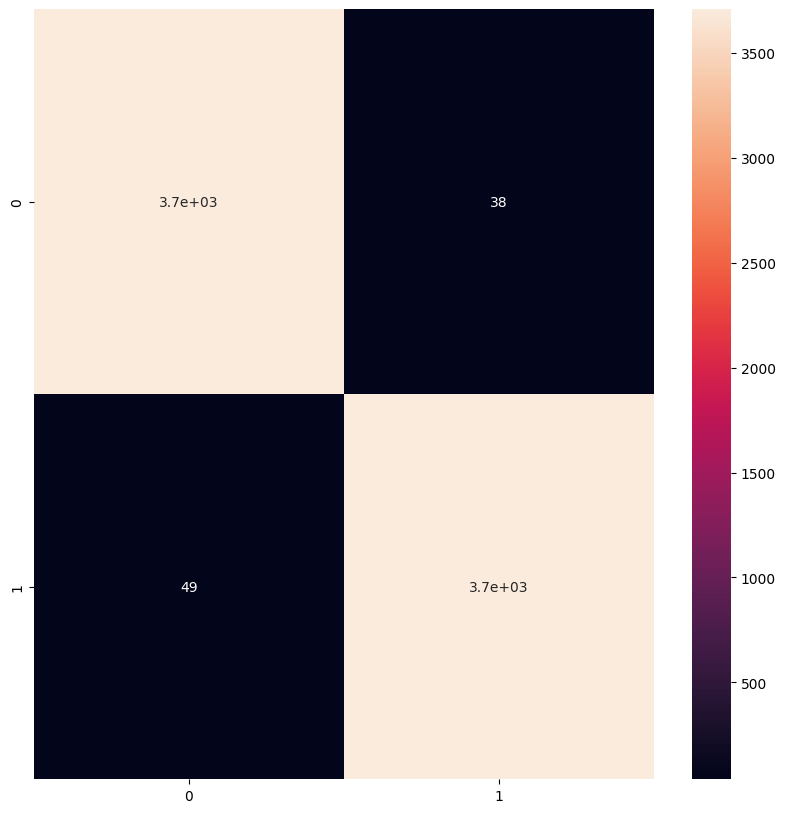

In [ ]:
#Get the confusion matrix
cm_bnb = confusion_matrix(y_test_cv, y_pred_cv)
plt.figure(figsize = (10, 10))
sns.heatmap(cm_bnb, annot = True)

In [ ]:
cm_bnb

array([[3708,   38],
       [  49, 3705]], dtype=int64)

In [ ]:
mnb = MultinomialNB()
y_pred_cv = mnb.fit(X_train_cv, y_train_cv).predict(X_test_cv)
print("Multinomial Naïve Bayes Algorithm's Accuracy Score:", accuracy_score(y_test_cv, y_pred_cv))
print("Multinomial Naïve Bayes Algorithm's Precision Score:", precision_score(y_test_cv, y_pred_cv))
print("Multinomial Naïve Bayes Algorithm's Recall Score:", recall_score(y_test_cv, y_pred_cv))
print("Multinomial Naïve Bayes Algorithm's F1 Score:", f1_score(y_test_cv, y_pred_cv))

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Multinomial Naïve Bayes Algorithm's Accuracy Score: 0.9781333333333333
Multinomial Naïve Bayes Algorithm's Precision Score: 0.9931318681318682
Multinomial Naïve Bayes Algorithm's Recall Score: 0.9629728289824188
Multinomial Naïve Bayes Algorithm's F1 Score: 0.9778198539356234


<Axes: >

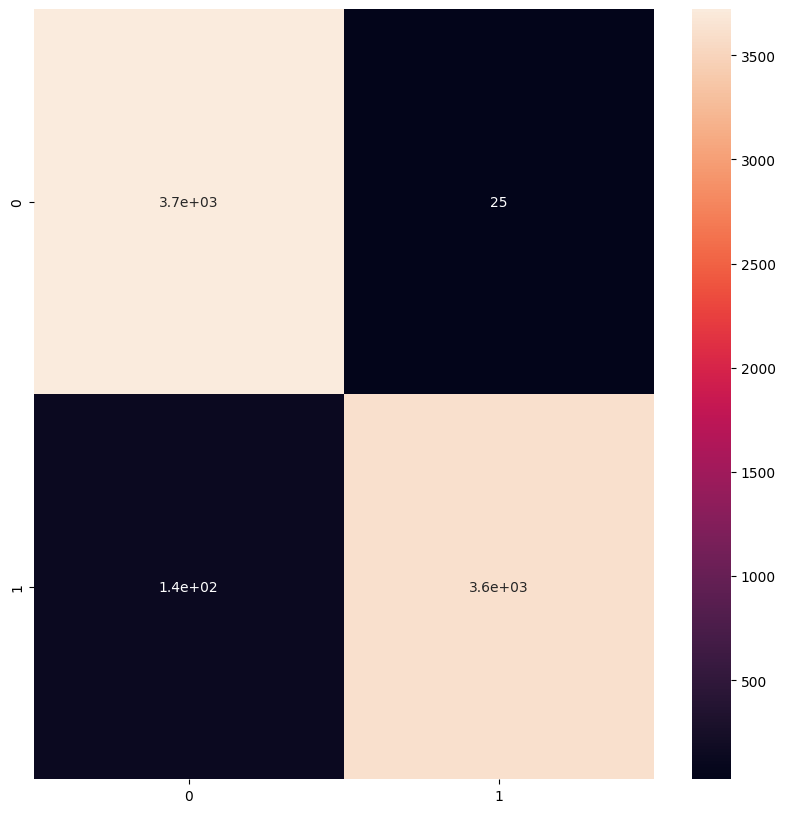

In [ ]:
#Get the confusion matrix
cm_mnb = confusion_matrix(y_test_cv, y_pred_cv)
plt.figure(figsize = (10, 10))
sns.heatmap(cm_mnb, annot = True)

In [ ]:
cm_mnb

array([[3721,   25],
       [ 139, 3615]], dtype=int64)

##Testing Headlines from Reuters (Real News)
[Link to the first news](https://www.reuters.com/world/us/bidens-supreme-court-pick-jackson-faces-us-senate-panel-vote-2022-04-04/)

[Link to the second news](https://www.reuters.com/business/russia-ukraine-fallout-starts-felling-fragile-frontier-economies-2022-04-04/)

In [ ]:
#For testing
result = bnb.predict(cv.transform(["Two more Senate Republicans announce support for Supreme Court pick Jackson"]).toarray())[0]
if result==0:
    print('FAKE')
else:
    print('REAL')

REAL


In [ ]:
#For testing
result = bnb.predict(cv.transform(["Analysis: Russia-Ukraine fallout starts felling fragile 'frontier' economies"]).toarray())[0]
if result==0:
    print('FAKE')
else:
    print('REAL')

REAL


##Testing Headlines from Politifact (Fake News)
[Link to the first news](https://www.politifact.com/factchecks/2022/apr/04/mike-gibbons/ohio-gop-candidate-falsely-says-more-votes-registe/)

[Link to the second news](https://www.politifact.com/factchecks/2022/mar/17/facebook-posts/persistent-high-gas-prices-dont-prove-price-gougin/)

In [ ]:
#For testing
result = bnb.predict(cv.transform(["According to the Census Bureau, “5 million more people voted than were registered to vote” in the 2020 election."]).toarray())[0]
if result==0:
    print('FAKE')
else:
    print('REAL')

FAKE


In [ ]:
#For testing
result = bnb.predict(cv.transform(["Comparing the price of oil and gas in June 2008 to March 2022 shows that oil companies are 'price gouging.'"]).toarray())[0]
if result==0:
    print('FAKE')
else:
    print('REAL')

FAKE


In [ ]:
import pickle
# Or import joblib if you prefer:
# import joblib

In [ ]:
# Save the trained BernoulliNB model
filename = 'bernoulli_naive_bayes_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(bnb, file)
print(f"Model saved as {filename}")

# You also need to save the CountVectorizer, as it transforms your text into numerical features
# that the model expects.
vectorizer_filename = 'count_vectorizer.pkl'
with open(vectorizer_filename, 'wb') as file:
    pickle.dump(cv, file)
print(f"CountVectorizer saved as {vectorizer_filename}")

Model saved as bernoulli_naive_bayes_model.pkl
CountVectorizer saved as count_vectorizer.pkl


##Conclusion and Limitations
We used 3 popular Naïve Bayes algorithms of `Scikit Learn` library - Gaussian, Bernoulli and Multinomial. The accuracy, precision, recall and f1 scores for all 3 algorithms are as follow: 

**Gaussian Naïve Bayes:**
* Accuracy (0.8416),
* Precision (0.8020244821092278),
* Recall (0.9075652637187) and
* F1 (0.8515371157210697)

**Bernoulli Naïve Bayes**
* Accuracy (0.9486666666666667),
* Precision (0.9420099711361847),
* Recall (0.9563132658497603) and
* F1 (0.9491077329808327)

**Multinomial Naïve Bayes**
* Accuracy (0.9426666666666667),
* Precision (0.946534121440086),
* Recall (0.9384656366542354) and
* F1 (0.9424826110219369)

Bernoulli Naïve Bayes is proven to be the most effective algorithm for detecting Fake News. Although Multinomial Naïve Bayes also performed very close to Bernoulli. As we can see in the testing, our model could successfully detect the fake news and the real news.

Due to some limitation in our computing capacity, we could not use all 44,898 rows and used 30,000 rows instead. This model can be tested on larger datasets.

